# Simple Linear Regression (단순 선형 회귀 분석)

## Contents
1. 기본 회귀모델 실습
2. mtcars 데이터셋으로 회귀분석 하기

---
# 1. 기본 회귀모델 실습

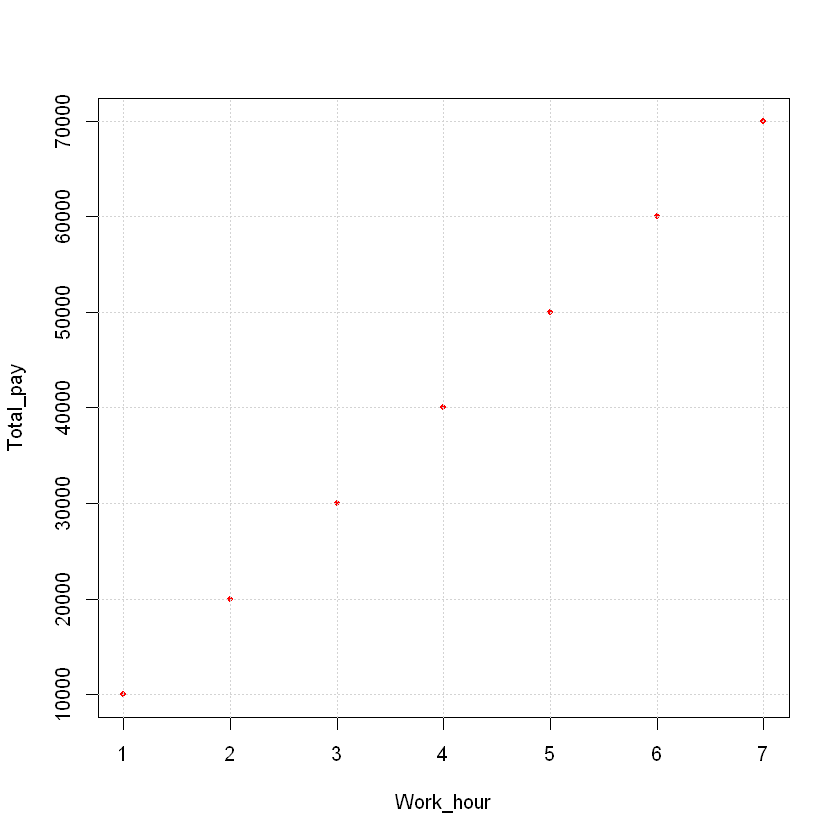

In [1]:
# Step 1: 데이터 준비하기
DF <- data.frame(Work_hour=1:7, Total_pay=seq(10000, 70000, by=10000))

# Step 2: 좌표에 데이터 그리기
plot(Total_pay ~ Work_hour, data=DF, pch=20, col="red")
grid()

단순 회귀 모형 $\hat{y} = b_0 x + b_1$를 fitting하는데에는 ```lm()```함수를 이용한다.

```lm()```의 사용방법: ```lm(종속변수 ~ 독립변수, 데이터)```

In [2]:
# Step 3: 절편과 기울기 구하기
LR <- lm(Total_pay ~ Work_hour, data=DF)
LR


Call:
lm(formula = Total_pay ~ Work_hour, data = DF)

Coefficients:
(Intercept)    Work_hour  
   -5.5e-12      1.0e+04  


In [3]:
# Step 4: Lm 속성 살펴보기
mode(LR)

[1] "list"

```lm()```함수의 반환값은 리스트이다. 

리스트에 어떤 값들이 들어있는지 확인한다.

In [4]:
names(LR)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [5]:
LR$coefficients
LR$residuals
LR$fitted.values

(Intercept)     Work_hour 
-5.500107e-12  1.000000e+04

1             2             3             4             5 
 1.003655e-11 -9.595644e-12 -1.905286e-12 -1.133158e-12 -1.043150e-12 
            6             7 
 8.658463e-13  2.774843e-12

1     2     3     4     5     6     7 
10000 20000 30000 40000 50000 60000 70000

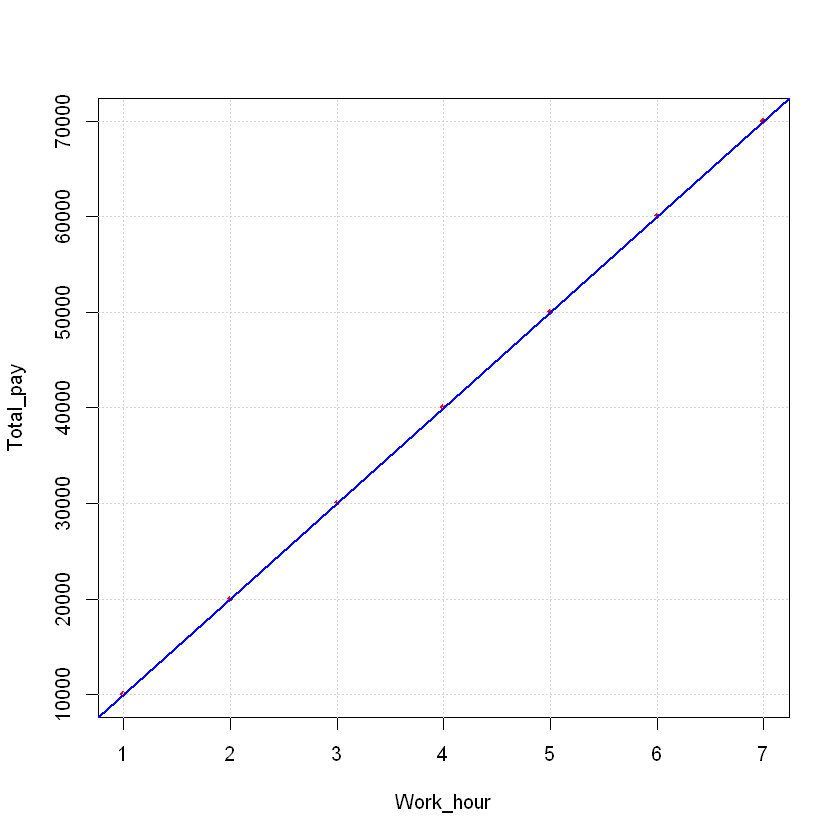

In [6]:
# Step 5: 그래프에 회귀모델 추가하기
plot(Total_pay ~ Work_hour, data=DF, pch=20, col="red")
grid()
abline(LR, col="blue", lwd=2)

---
# 2. mtcars 데이터셋으로 회귀분석하기
## mtcars 데이터셋
R에 기본내장된 데이터셋으로 Motor Trend Car Road Tests의 약자
* \# observations : 32
* variables
     * mpg(Miles/gallon) - 연비
     * cyl (Number of cylinders) - 실린더 수
     * disp (Displacement) - 배기량
     * hp (Gross horsepower) - 마력
     * drat (Rear axle ratio) - 후방 차축 비율
     * wt (Weight (lb/1000)) - 차체 몸무게
     * qsec (1/4 mile time) - 400m까지 걸리는 시간 (드래그 레이스 타임)
     * vs (V/S) - vs
     * am (Transmission (0 = automatic, 1 = manual)) - 미션 종류
     * gear (Number of forward gears) - 전진장치의 개수
     * carb (Number of carburetors) - 기화기 수
mtcars 객체는 이미 기본 내장되어 있어 바로 사용 가능하다.

In [7]:
# Step 1: 데이터 확인하기
head(mtcars)

# Step 2: mtcars 구조 살펴보기
str(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


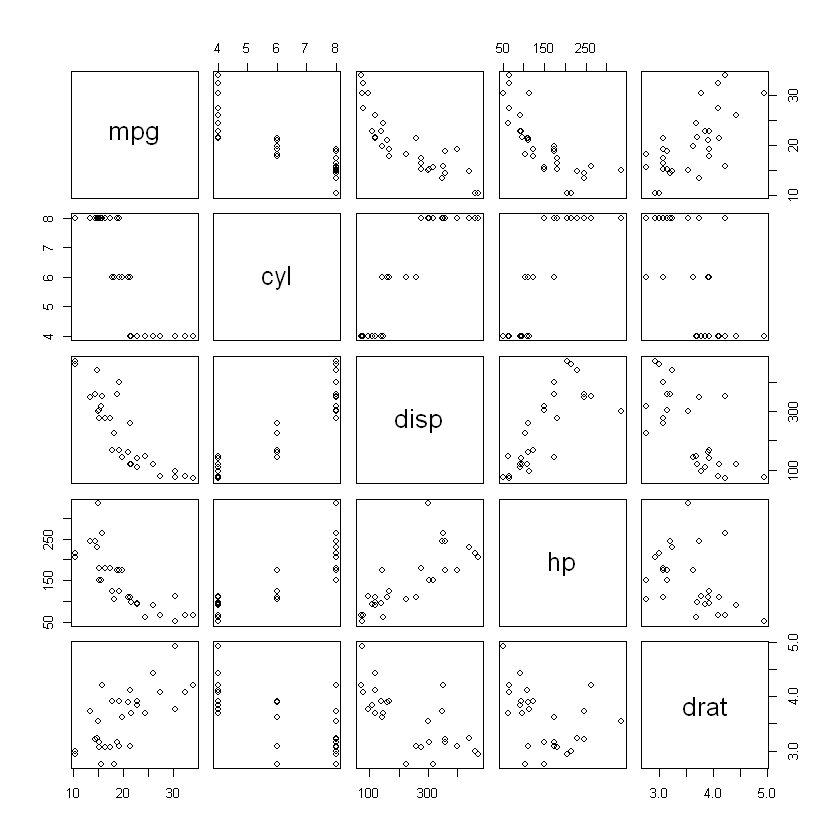

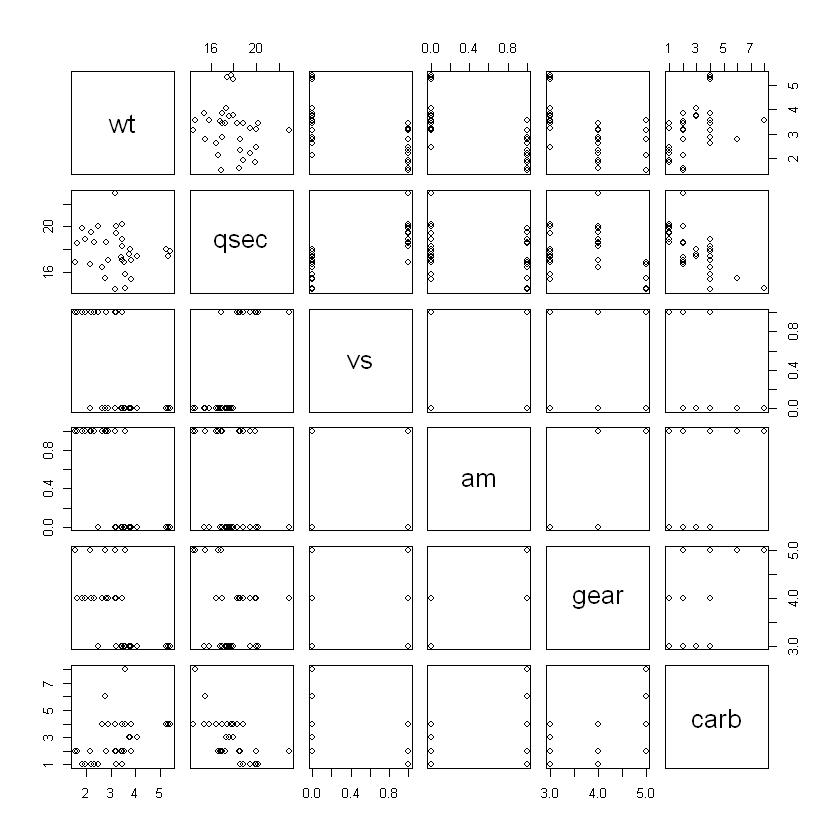

In [8]:
# Step 3: 모든 변수의 산점도 그려 상관관계가 큰 변수쌍 찾기
plot(mtcars[,c(1:5)])
plot(mtcars[,c(6:11)])

mpg (연비)와 disp (배기량)의 그래프가 높은 상관관계를 보임을 확인할 수 있다.

In [11]:
cor(mtcars$mpg, mtcars$disp)

[1] -0.8475514

이외에도 아웃라이어는 없는지, 데이터는 어느 구간에 몰려있는지 ```hist()``` 또는 ```boxplot()``` 그래프를 그려 확인할 수 있다.

In [ ]:
# Step 4: 회귀분석 후 그래프 그리기
plot(mpg ~ disp, data=mtcars)
Lm <- lm(mpg ~ disp, data=mtcars)
abline(Lm, col="red")